In [1]:
import pandas as pd 
import calour as ca 

In [2]:
import pandas as pd 
import calour as ca 
import matplotlib.pyplot as plt
from qiime2 import Artifact
%matplotlib inline

In [3]:
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns',100)

In [4]:
ca.set_log_level(11)

In [5]:
#
exp=ca.read_amplicon('../deblur-results/core-metrics-no-mito-no-chlo-results-with-hp-abundance-1001/rarefied_table.qza',
                     '../../illumina-meta-analysis/all-data-meta-analysis/metadata-raw.tsv',
                     data_file_type='qiime2',normalize=100,min_reads=None)

2022-04-15 16:11:58 INFO loaded 381 samples, 8646 features
2022-04-15 16:11:59 WARNING These have metadata but do not have data - dropped (2357): {'SRR7989451', 'SRR6478162', 'SRR8808427', 'SRR5269794', 'SRR6478159', 'ERR2014726', 'SRR5269972', 'SRR7989325', 'SRR6478290', 'SRR3194044', 'SRR6477692', 'SRR8808437', 'SRR5269784', 'SRR5270039', 'ERR2597246', 'SRR7989371', 'SRR6477808', 'SRR6478067', 'ERR2092811', 'SRR3991086', 'SRR8031228', 'SRR5269734', 'SRR6478172', 'SRR8031258', 'ERR2597280', 'SRR3991190', 'SRR6477681', 'SRR6478320', 'SRR3991210', 'ERR1995110', 'SRR3991198', 'SRR6478151', 'SRR5269815', 'SRR3991189', 'SRR3991094', 'ERR2597279', 'ERR1995013', 'SRR3991209', 'SRR6477759', 'SRR3991296', 'ERR2597171', 'SRR6477806', 'SRR3194142', 'ERR2597062', 'ERR2597219', 'SRR6478103', 'SRR6477803', 'SRR5269755', 'ERR1994988', 'SRR3991228', 'SRR3991013', 'SRR5269817', 'ERR1995001', 'ERR2597001', 'SRR12147674', 'SRR8031281', 'SRR5269861', 'SRR6477943', 'SRR6478272', 'SRR3991218', 'ERR1995067'

In [6]:
taxo=Artifact.load('../deblur-results/taxonomy.qza').view(pd.DataFrame)
taxo.head(2)

,Taxon,Confidence
Feature ID,,
TACGTAGGGGGCAAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGCACGGCAAGTCAGGAGTGAAAGCCCTGGGCTCAACCCGGGAACTGCTTTTGAAACTGCCGAGCTAGAGTGCGGAAGGGGCAACTGGAATTCCCAGTGTAGCGGTGAAATGCGTAGATATTGGGAAGAACACCTGAGGCGAAGGCGGGTTGCTGGGCCGACACTGACGCTGAGGCGCGAAAGCCAGGGGAGCGAAC,k__Bacteria; p__Acidobacteria; c__[Chloracidobacteria]; o__DS-100; f__; g__; s__,0.9998920636257311
TACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGTTTTTCAAGTCAGGCGTGAAAGCCCCGGGCTTAACCTGGGAACTGCGCTTGAGACTGTAAGACTAGAGTACCGGAGAGGTAGGTGGAATTCCCAGTGTAGAGGTGAAATTCGTAGATATTGGGAAGAACACCAGTGGCGAAGGCGGCCTACTGGACGGTAACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAAC,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodospirillales; f__Rhodospirillaceae; g__Azospirillum; s__irakense,0.7492088040174248


In [7]:
exp.feature_metadata=exp.feature_metadata.join(taxo,on='_feature_id')
exp.feature_metadata.head(2)

,_feature_id,Taxon,Confidence
TACGTAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGCAGGCGGCCCGTTAAGACAGGTGTGAAATCCCTGGGCTCAACCTAGGAATTGCGCTTGTGACTGGCGGGCTCGAGTACGGTAGAGGGGGGTGGAATTCCTGGTGTAGCAGTGAAATGCGTAGAGATCAGGAGGAACACCGATGGCGAAGGCAGCCTCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,TACGTAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGCAGGCGGCCCGTTAAGACAGGTGTGAAATCCCTGGGCTCAACCTAGGAATTGCGCTTGTGACTGGCGGGCTCGAGTACGGTAGAGGGGGGTGGAATTCCTGGTGTAGCAGTGAAATGCGTAGAGATCAGGAGGAACACCGATGGCGAAGGCAGCCTCCTGGGCCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Rhodocyclales; f__Rhodocyclaceae; g__Hydrogenophilus; s__,0.999915571421025
TACGAAGGGGGCTAGCGTTGTTCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGACGATTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAATTGCCCTTGATACTGGTTGTCTTGAGATTGGAAGAGGTAAGTGGAATTGCGAGTGTAGAGGTGAAATTCGTAGATATTCGCAAGAACACCGGTGGCGAAGGCGACTTACTGGTCCATATCTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAAC,TACGAAGGGGGCTAGCGTTGTTCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGACGATTAAGTCAGGGGTGAAATCCCGGGGCTCAACCCCGGAATTGCCCTTGATACTGGTTGTCTTGAGATTGGAAGAGGTAAGTGGAATTGCGAGTGTAGAGGTGAAATTCGTAGATATTCGCAAGAACACCGGTGGCGAAGGCGACTTACTGGTCCATATCTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAAC,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Beijerinckiaceae; g__; s__,0.9906016651343154


In [8]:
exp.split_taxonomy(field='Taxon')

AmpliconExperiment with 381 samples, 8646 features

In [9]:
# discard low abundance feadture and not prevalence feature
exp_f=exp.filter_sum_abundance(cutoff=0.09)
exp_f=exp_f.filter_prevalence(cutoff=0.01,fraction=0.005)

2022-04-15 16:12:18 INFO After filtering, 8646 remain.
2022-04-15 16:12:18 INFO After filtering, 2505 remain.


# pylori

In [10]:
# select hp stain 
exp_hp=exp_f.filter_by_metadata('species',[' s__pylori'],axis='f')
exp_hp

AmpliconExperiment with 381 samples, 5 features

In [11]:
exp_hp.feature_metadata

,_feature_id,Taxon,Confidence,kingdom,phylum,class,order,family,genus,species
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGTGCGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGTGCGAAAGCGTGGGGAGCAAA,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__pylori,0.9972489047294044,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__pylori,0.9958422486292865,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTCATGTGCGAAAGCGTGGGGAGCAAAC,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTCATGTGCGAAAGCGTGGGGAGCAAAC,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__pylori,0.9956181753555096,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
TACGGAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__pylori,0.9953437321368471,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCACGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCACGAAAGCGTGGGGAGCAAA,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__pylori,0.9917107559382162,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori


In [12]:
exp_heli=exp_f.filter_by_metadata('genus',[' g__Helicobacter'],axis='f')
exp_heli

AmpliconExperiment with 381 samples, 7 features

In [13]:
exp_heli.feature_metadata

,_feature_id,Taxon,Confidence,kingdom,phylum,class,order,family,genus,species
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGAGGACAAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTATCCTTCTGGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATCACTGACGCTGATTGCACGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGAGGACAAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTATCCTTCTGGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATCACTGACGCTGATTGCACGAAAGCGTGGGGAGCAAA,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__,0.8548584541368123,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGTGCGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGTGCGAAAGCGTGGGGAGCAAA,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__pylori,0.9972489047294044,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__pylori,0.9958422486292865,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTCATGTGCGAAAGCGTGGGGAGCAAAC,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTCATGTGCGAAAGCGTGGGGAGCAAAC,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__pylori,0.9956181753555096,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
TACGGAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__pylori,0.9953437321368471,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGG

In [14]:
hp=exp_hp.to_pandas(sparse=False)
hp.head()

,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGTGCGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTCATGTGCGAAAGCGTGGGGAGCAAAC,TACGGAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCGCGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGCGTAGGCGGGATAGTCAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTACTATTCTAGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATTGCACGAAAGCGTGGGGAGCAAA
sample-id,,,,,
SRR7534193,0.0,19.180819,0.0,0.0,0.0
SRR7534196,0.0,0.000000,0.0,0.0,0.0
SRR7534195,0.0,0.000000,0.0,0.0,0.0
SRR7534198,0.0,32.967033,0.0,0.0,0.0
SRR7534197,0.0,1.998002,0.0,0.0,0.0


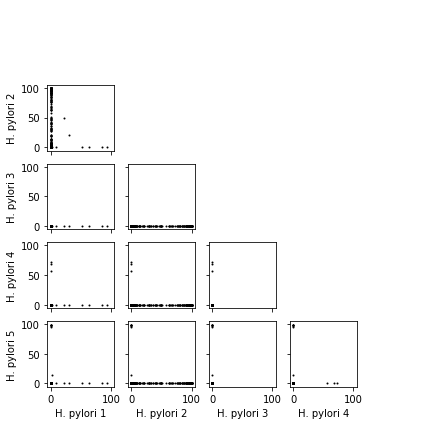

In [15]:
dispar=hp
t='H. pylori'
n = dispar.shape[1]
fig, axs = plt.subplots(n, n, figsize=(7, 7), sharex=True, sharey=True)
for column, a in enumerate(dispar.columns):
    for index, b in enumerate(dispar.columns):
        if index > column:
            axs[index, column].scatter(x=dispar.loc[:, a], 
                                       y=dispar.loc[:, b],
                                       s=1,
                                       marker='o',
                                       color='black') # s: markersize
            axs[index, column].set_ylabel('%s %s' % (t, str(index + 1)))
            axs[index, column].set_xlabel('%s %s' % (t, str(column + 1)))
        else:
            axs[index, column].axis('off')
for ax in axs.flat:
    ax.label_outer()

#fig.savefig('hp-vs-hp-scatter-plot.pdf')


# non pylori Helicobacter

In [17]:
exp_heli=exp_f.filter_ids(non_pylori_heli_ID,axis='f')
exp_heli

AmpliconExperiment with 381 samples, 2 features

In [18]:
heli=exp_heli.to_pandas(sparse=False)

In [19]:

exp_heli.feature_metadata['species'].replace({' s__':None},inplace=True)

In [20]:
exp_heli.feature_metadata

,_feature_id,Taxon,Confidence,kingdom,phylum,class,order,family,genus,species
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGAGGACAAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTATCCTTCTGGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATCACTGACGCTGATTGCACGAAAGCGTGGGGAGCAAA,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGAGGACAAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTATCCTTCTGGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATCACTGACGCTGATTGCACGAAAGCGTGGGGAGCAAA,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__,0.8548584541368123,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,None
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGGTAATAAGTCAGATGTGAAATCCTGTAGCTTAACTACAGAACTGCATTTGAAACTGTTACTCTGGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATGCACGAAAGCGTGGGGAGCAAAC,TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGGTAATAAGTCAGATGTGAAATCCTGTAGCTTAACTACAGAACTGCATTTGAAACTGTTACTCTGGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATGCACGAAAGCGTGGGGAGCAAAC,k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Helicobacteraceae; g__Helicobacter; s__hepaticus,0.9661493294282831,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__hepaticus


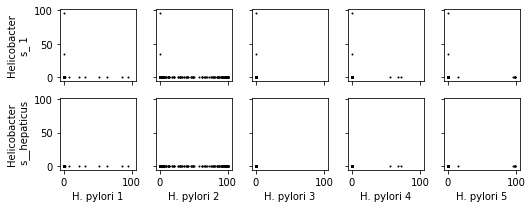

In [21]:
fig, axs = plt.subplots(heli.shape[1], hp.shape[1], figsize=(7.5,3), sharex=True, sharey=True)
for column, a in enumerate(hp.columns):
    for index, b in enumerate(heli.columns):
        
        axs[index, column].scatter(x=hp.loc[:, a], 
                                       y=heli.loc[:, b],
                                       s=1,
                                       marker='o',
                                       color='black') # s: markersize
        #axs[index, column].set_ylabel('%s %s' % ('s_unk_non_pylori_helicobactor', str(index + 1))) 
        
        axs[index, column].set_xlabel('%s %s' % ('H. pylori', str(column + 1)))
        if exp_heli.feature_metadata.loc[b,'species'] ==None :
            
            axs[index, column].set_ylabel('Helicobacter\n%s %s' % ('s_', str(index + 1)))
        else:
            axs[index, column].set_ylabel('Helicobacter\n' + exp_heli.feature_metadata.loc[b,'species'])

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
#fig.savefig('hp-vs-non-pylori-helicobactor-scatter-plot.pdf') 

In [22]:
non_pylori_heli_ID=exp_f.feature_metadata.query('(genus == " g__Helicobacter") & ( species!= " s__pylori")').index.to_list()
non_pylori_heli_ID  

['TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGAGGACAAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTATCCTTCTGGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATCACTGACGCTGATTGCACGAAAGCGTGGGGAGCAAA',
 'TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGGTAATAAGTCAGATGTGAAATCCTGTAGCTTAACTACAGAACTGCATTTGAAACTGTTACTCTGGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATTACTGACGCTGATGCACGAAAGCGTGGGGAGCAAAC']

heli1：
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGTGCGTAGGCGGGAGGACAAGTCAGGTGTGAAATCCTATGGCTTAACCATAGAACTGCATTTGAAACTATCCTTCTGGAGTGTGGGAGAGGTAGGTGGAATTCTTGGTGTAGGGGTAAAATCCGTAGAGATCAAGAGGAATACTCATTGCGAAGGCGACCTGCTGGAACATCACTGACGCTGATTGCACGAAAGCGTGGGGAGCAAA
blast results：

![image.png](attachment:e43a18d9-7cb0-48fe-b2f9-6e790cf6fc87.png)

In [25]:
t =heli
t.columns=['heli1','heli2']
t.query('heli1 >1')
#t

,heli1,heli2
sample-id,,
SRR7534088,96.603397,0.0
SRR7533964,35.264735,0.0
